<AxesSubplot:xlabel='month'>

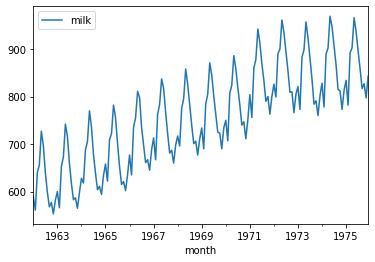

In [1]:
import numpy as np
import pandas as pd
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
milk.plot()

Критерий Дики-Фуллера на проверку стационарности первой производной ряда (попарных разностей).

In [2]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk)

(-1.3038115874221294,
 0.6274267086030316,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

4166.33


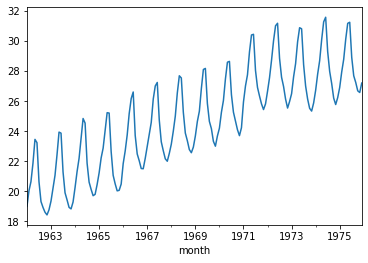

In [10]:
milk['daily'] = milk.milk / milk.index.days_in_month

milk['daily'].plot()
print ("%.2f" % np.round(milk['daily'].sum(), 2))

Дифференцируем ряд до стационарности

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


0.06430054654174293

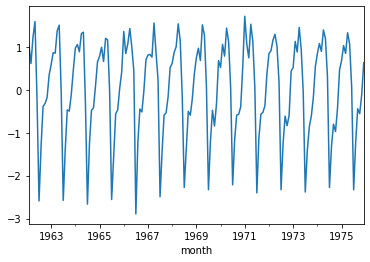

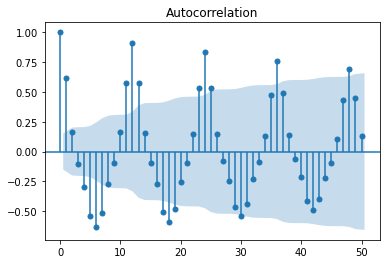

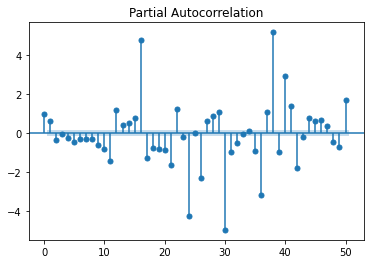

In [30]:
def diff(row, shift):
    row = (row - row.shift(shift)).dropna()
    row.plot()
    sm.graphics.tsa.plot_acf(row.values.squeeze(), lags=50)
    sm.graphics.tsa.plot_pacf(row.values.squeeze(), lags=50)
    return sm.tsa.stattools.adfuller(row)[1]

diff(milk.daily, 1)